In [1]:
#Tarvittavien kirjastojen tuominen.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Datan avaaminen nettisivulta.
df = pd.read_csv('http://taanila.fi/data1.csv', delimiter = ';')
df.tail(5)


,nro,sukupuoli,ikä,perhe,koulutus,palvelusvuodet,palkka,tyytyväisyys johtoon,tyytyväisyys työtovereihin,tyytyväisyys työympäristöön,tyytyväisyys palkkaan,tyytyväisyys työtehtäviin,työterveyshuolto,lomaosake,kuntosali,hieroja
77,78,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,NaN,1.0,1.0,NaN
78,79,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,1.0,NaN,NaN,NaN
79,80,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,1.0,NaN,1.0,NaN
80,81,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,NaN,NaN,NaN,NaN
81,82,2,35,2,3.0,15.0,2183,3,4.0,4,3,4,1.0,NaN,NaN,NaN


In [3]:
#Muuttujien tekstimuotoisten arvojen tallentaminen.
koulutus = ["peruskoulu", "2. aste", "korkeakoulu", "ylempi korkeakoulu"]
tyytyväisyys = ["tyytymätön", "jokseenkin tyytyväinen", "tyytyväinen", "todella tyytyväinen"]
sukupuoli = ["mies", "nainen"]
perhe = ["perheellinen", "perheetön"]

In [4]:
#N-arvot seuraavaa taulukointia varten.
dfn=df.groupby('sukupuoli')['koulutus'].count()

In [5]:
#Ristiintaulukointi miesten ja naisten koulutuksista crosstabin avulla.
df1 = pd.crosstab(df["koulutus"],df["sukupuoli"], normalize = "columns")
df1.index = koulutus
df1.columns.name = ""
mies='Mies (n='+str(dfn[1])+')'
nainen='Nainen (n='+str(dfn[2])+')'
df1.columns = [mies, nainen]
df1.style.format('{:.0%}')

,Mies (n=62),Nainen (n=19)
peruskoulu,35%,26%
2. aste,37%,37%
korkeakoulu,24%,37%
ylempi korkeakoulu,3%,0%


[Text(0, 0, '0%'),
 Text(0, 0, '5%'),
 Text(0, 0, '10%'),
 Text(0, 0, '15%'),
 Text(0, 0, '20%'),
 Text(0, 0, '25%'),
 Text(0, 0, '30%'),
 Text(0, 0, '35%'),
 Text(0, 0, '40%')]

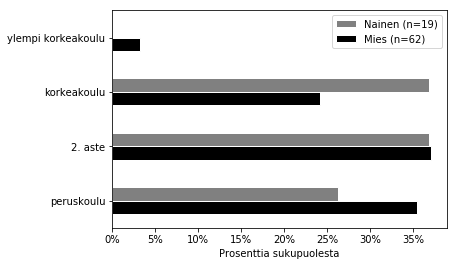

In [6]:
#Pylväskaavio edellisestä. Lisäksi muokkasin pylväät selitteiden mukaisesti oikeaan järjestykseen.
ax=df1.plot.barh(color=["black", "grey"], edgecolor = "white")
plt.xlabel("Prosenttia sukupuolesta")
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='best')
vals = ax.get_xticks()
ax.set_xticklabels(['{:.0%}'.format(x) for x in vals])

Text(0.5, 0, 'Käyttäjien lukumäärä')

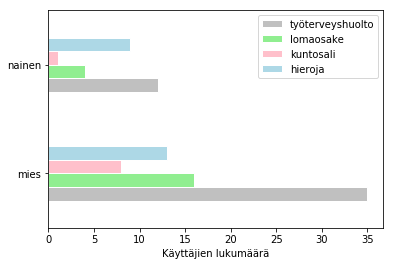

In [7]:
#Monivalintojen lukumäärien laskeminen count-funktiolla sukupuolten mukaisesti.
df2 = df.groupby ("sukupuoli")["työterveyshuolto", "lomaosake", "kuntosali", "hieroja"].count()
df2.index = sukupuoli
df2.plot.barh(color=["silver", "lightgreen", "pink", "lightblue"], edgecolor = "white")
plt.xlabel("Käyttäjien lukumäärä")

Text(0, 0.5, 'Lukumäärä')

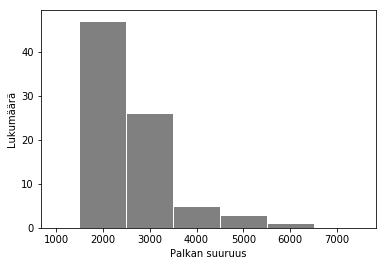

In [8]:
#Palkkojen luokiteltu jakauma bins -toiminnolla ja histogrammi kyseisestä luokitellusta jakaumasta.
bins = [1000, 1500, 2500, 3500, 4500, 5500, 6500, 7500]
df["palkkaluokka"] = pd.cut(df["palkka"], bins = 1000)
df3 = pd.crosstab(df["palkkaluokka"], "n")
df3.columns.name = ""
df3
df["palkka"].plot.hist(bins, color="grey", edgecolor = "white")
plt.xlabel("Palkan suuruus")
plt.ylabel("Lukumäärä")

In [9]:
#Naisten ja miesten keskiarvopalkka.
df5 = df.pivot_table(values = "palkka", index = "sukupuoli")
df5.index = sukupuoli
df5.style.format('{:.0f}')

,palkka
mies,2664
nainen,2233


Text(0.5, 0, 'Palkkakeskiarvo sukupuolen mukaisesti')

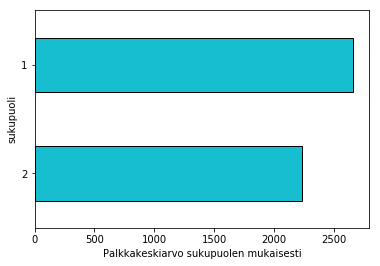

In [10]:
#Naisten ja miesten keskiarvopalkka taulukkomuodossa.
ax = df.pivot_table(values="palkka", index="sukupuoli").sort_values("palkka").plot.barh(legend=False, color=["C9"], edgecolor = "black")
ax.set_xlabel('Palkkakeskiarvo sukupuolen mukaisesti')

In [11]:
#Palkkakeskiarvot koulutuksen mukaisesti.
df4 = df.pivot_table(values = 'palkka', index = 'koulutus')
df4.index = koulutus
df4.style.format('{:.0f}')

,palkka
peruskoulu,2310
2. aste,2403
korkeakoulu,2887
ylempi korkeakoulu,5147


Text(0.5, 0, 'Palkkakeskiarvo koulutuksen mukaisesti')

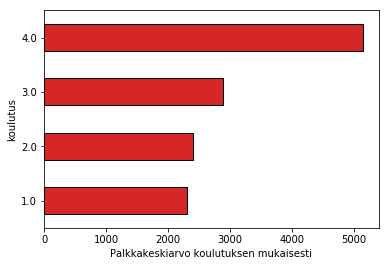

In [12]:
#Palkkakeskiarvot koulutuksen mukaan taulukkomuodossa.
ax = df.pivot_table(values="palkka", index="koulutus").sort_values("palkka").plot.barh(legend=False, color=["C3"], edgecolor = "black")
ax.set_xlabel('Palkkakeskiarvo koulutuksen mukaisesti')

In [13]:
#Palkkakeskiarvot koulutuksen ja perheen mukaisesti.
df6 = df.pivot_table(values = 'palkka', index= 'koulutus', columns='perhe')
df6.index = koulutus
df6.columns = perhe
df6.style.format('{:.0f}')

,perheellinen,perheetön
peruskoulu,2199,2376
2. aste,2057,2668
korkeakoulu,2587,3000
ylempi korkeakoulu,5225,5069


Text(0.5, 0, 'Palkka')

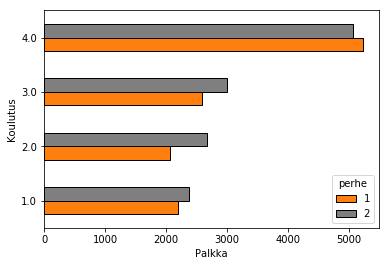

In [14]:
#Edellinen taulukkomuodossa.
df.pivot_table(values = "palkka", index = "koulutus", columns = "perhe").plot(kind= 'barh', color=["C1", "C7"], edgecolor = "black")
plt.ylabel("Koulutus")
plt.xlabel("Palkka")

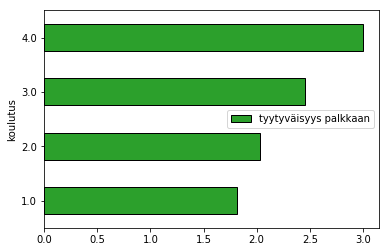

In [15]:
#Tyytyväisyys palkkaan koulutuksen mukaan.
df7 = df.pivot_table(values = "tyytyväisyys palkkaan", index= "koulutus").plot(kind= 'barh', color=["C2"], edgecolor = "black")

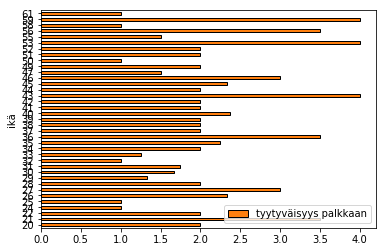

In [16]:
#Tyytyväisyys palkkaan iän mukaisesti.
df8 = df.pivot_table(values = "tyytyväisyys palkkaan", index= "ikä").plot(kind= 'barh', color=["C1", "C7"], edgecolor = "black")

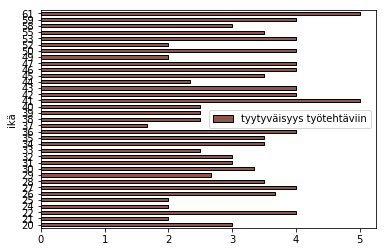

In [22]:
#Miesten tyytyväisyys työtehtäviin iän mukaisesti.
df[df['sukupuoli'] == 1].pivot_table(values = "tyytyväisyys työtehtäviin", index = "ikä").sort_values("ikä").plot(kind='barh', color=["C5"], edgecolor = "black")

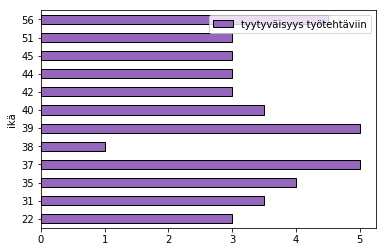

In [21]:
#Naisten tyytyväisyys työtehtäviin iän mukaisesti.
df[df['sukupuoli'] == 2].pivot_table(values = "tyytyväisyys työtehtäviin", index = "ikä").sort_values("ikä").plot(kind='barh', color=["C4"], edgecolor = "black")